Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



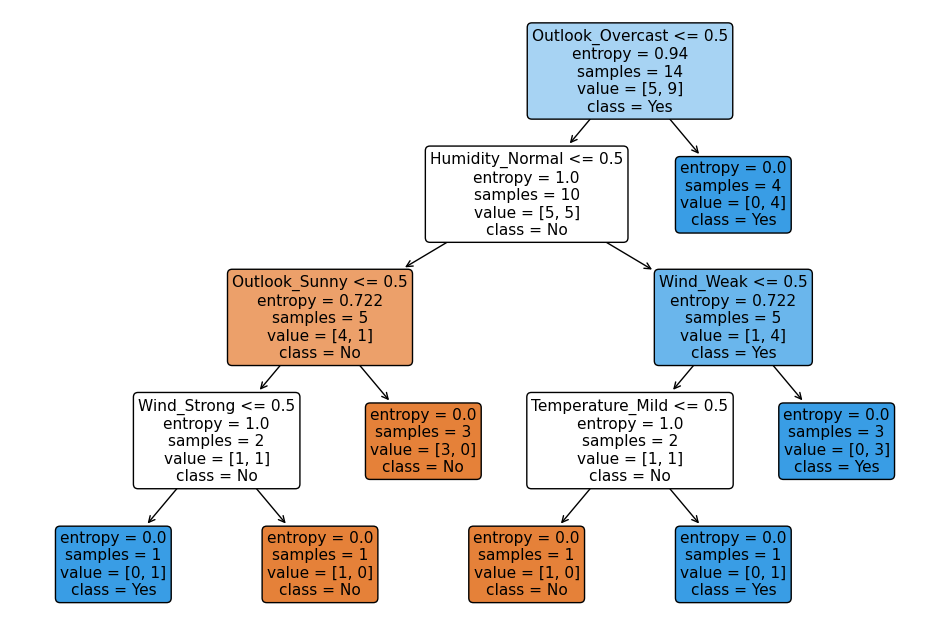

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
data = pd.read_csv('decision_tree.csv')
x = data.iloc[:,:-1]
y = data.iloc[:,-1:].values

x_encoded = pd.get_dummies(x, columns=['Outlook','Temperature', 'Humidity', 'Wind'])


x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_encoded, y)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree (optional)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=x_encoded.columns, class_names=[str(i) for i in model.classes_], filled=True, rounded=True, impurity=True)
plt.show()